# Итоговая задача

Общее описание: необходимо написать  программу, которая принимает fastq файл и на выходе даёт набор базовых статистик и графиков. Каждый тип статистики и графиков выполняется в своем блоке, описанном ниже:

Документация:
- fastq файл (https://ru.wikipedia.org/wiki/FASTQ)
- phred (https://en.wikipedia.org/wiki/Phred_quality_score)
- ASCII (https://ru.wikipedia.org/wiki/ASCII)


## Чтение файла

Документ FASTQ обычно использует четыре строки на каждую последовательность.

- Строка 1 начинается с символа «@», за ней следует идентификатор последовательности и необязательное описание (например, строка заголовка FASTA).
- Строка 2 — это необработанные символы последовательности.
- Строка 3 начинается с символа «+» и является необязательной, после чего снова следует тот же идентификатор последовательности (и любое описание).
- Строка 4 кодирует значения качества для последовательности в строке 2 и должна содержать то же количество символов, что и строка последовательности.

Пример строк файла:  
@HWI-ST1113:242:H0Y72ADXX:1:1101:1329:2072 1:Y:0:AGTCAA  
TCACTTNNCTTGCCATATTCCACGTCCTACAGTGGA  
\+  
<<<??@##2<=@?@????@@@?@?@??@???@????  
@HWI-ST1113:242:H0Y72ADXX:1:1101:1430:2115 1:N:0:AGTCAA  
TAGAAAAATGATGATATCACTGAAAAACGTGAAAAA  
\+  
BCCFFFFFHHHHHJGIJJIJJJJJJJJJJIIJJJJI  


В документе множество таких последовательностей, необходимо каждую из них получить по отдельности, а не создавать общую длинную строку.

## Получение базовой статистики

- имя файла
- количество последовательностей в fastq файле
- самая часто встречающая длина последовательности
- средний GC состав в файле
- средний нуклеотидный состав

## Работа с адаптерными последовательностями

- спросить пользователя размер мнимального вхождения адаптерной последовательности. Если вводимое пользователем число меньше 3, то выдавать сообщение, что этослишком короткое вхождение и уставливать все равно минимальное 3.
- после рассчета базовой статистики, предложите пользователю удалить алаптеры. Если ответ положительный, то необходимо найти адаптерные последовательности (они будут вам даны отдельным файлом) с учетом того, что адаптер может быть представлен не полностью
- посчитать количество удаленных адаптерных последовательностей
- сохраните все изменненные последовательности в новый fastq файл

## Графическая визуализация

необходимо построить следующие графики:

- добавить возмонжость выбора качества сохраняемых графиков
- Распределение длин последовательностей
- общий (единый, не subplot) график распределение GC состава последовательностей
- график частоты нуклеотидов в каждой позиции в последовательностях
- Рассчитать для каждой последовательности средний phred score и визуализировать распределения этих значений на графике
- построить график среднего значения Phred-score для позиции каждого нуклеотда в последовательностях

## Вывод статистики

- создать таблицу DataFrame со всей статистикой
- если производилось удаление адаптерных последовательностей, то добавить их в статистику
- сохранить эту таблицу также в отдельный файл
- сохранить графики по отдельности
- добавить возможность создания subplots из всех графиков


# Что такое Phred score и как его считать:
Phred значение (Phred-score или Q-score) описвает качество идентификации нуклеотида секвенатором. В FASTQ файлах Phred-score кодируются ASCII символами. Благодаря этому каждое значение Phred score кодируется одним симоволом, соответствующим одному нуклеотиду последовательности. В рамках домашнего задания исопльзуется Phred+33. Для получения численого предствления Phred-score для нуклеотида необходимо получить порядковый номер символа в кодировке ASCII при помощи метода **ord()**. Например, **ord('&')** вернёт значение 38. Для получение Q-score необходимо вычесть из полученного значения 33. Таким образом, символ & соответствует Phred-score = 3.




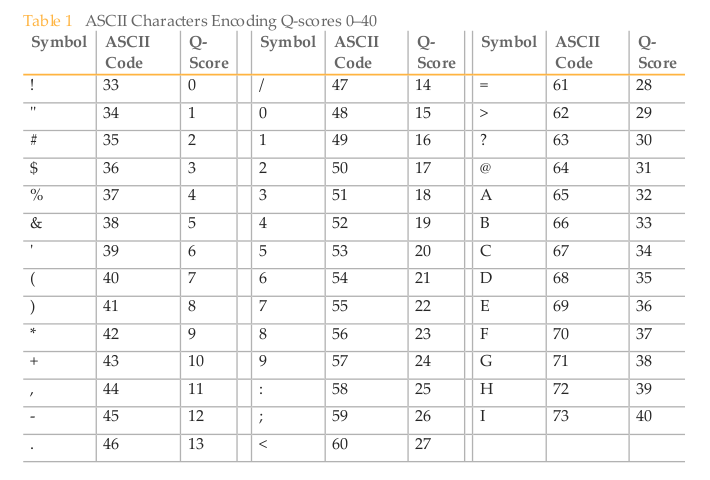

Пример графика длины последовательностей

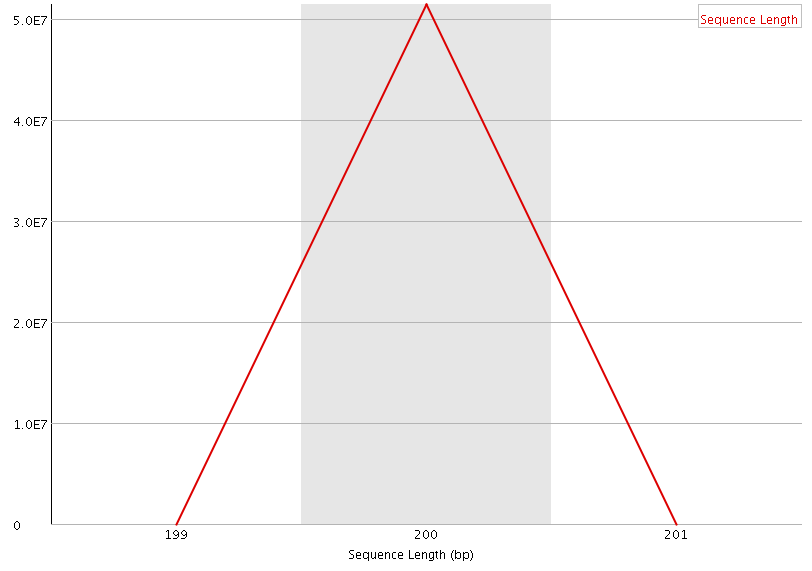

Пример графика частоты нуклеотидов
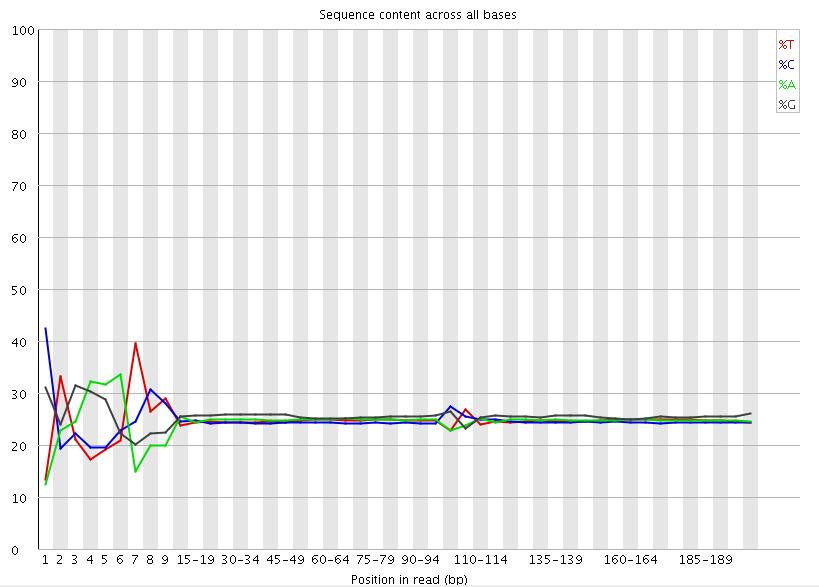

Пример графика phred score для последовательностей

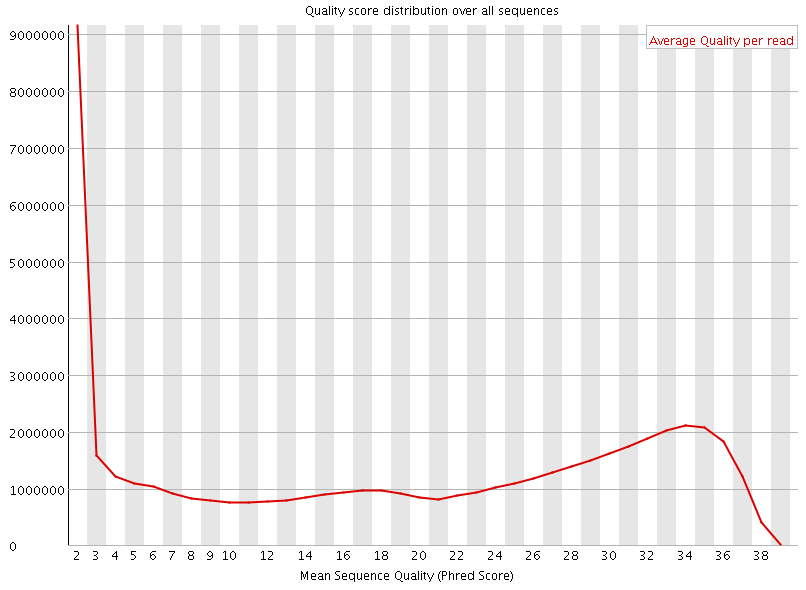

Пример графика phred score для каждого нуклеотида. Вам не надо делать box-plot, как в примере, необходимо просто построить график среднего значения (синяя линия на графике)

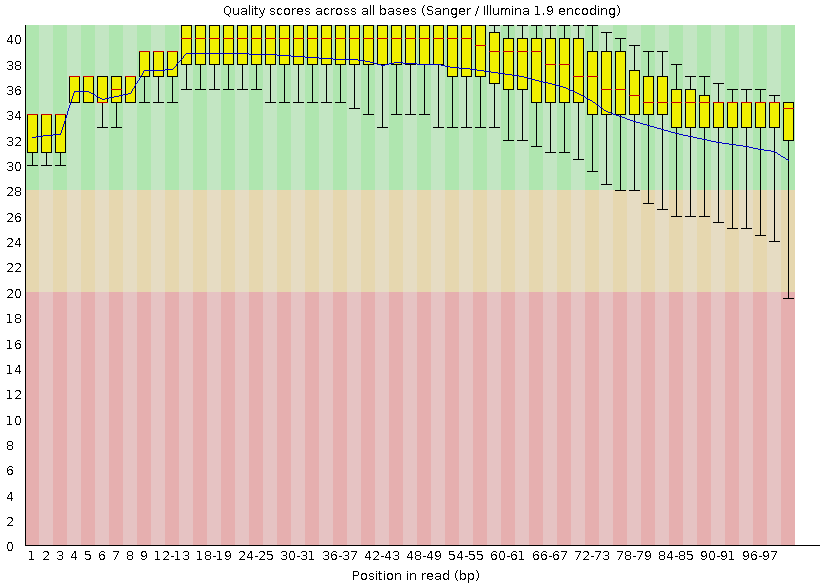

File name: READS055722.student_11.fastq
Number of sequences in fastq file: 4279
Most frequent length of sequence: 76
Average GC - composition of sequences: 39.68985621333076
Average nucleotide composition of sequences: {'A': 0.3003622341668614, 'T': 0.30271767874933886, 'G': 0.19420425333021735, 'C': 0.20269430880308975}




Enter the minimum length of insertion of the adapter sequence:  3
Do you want to remove the adapters? (yes/no):  yes


Number of deleted adapters: 323
New fastq file saved as: c:\Sirius\Programming\python-for-beginners\homework tasks\..\lections\files_and_images\final_task\READS055722.student_11_changed.fastq


File name: READS055722.student_11_changed.fastq
Number of sequences in fastq file: 4279
Most frequent length of sequence: 76
Average GC - composition of sequences: 39.754375781269545
Average nucleotide composition of sequences: {'A': 0.3011569939898433, 'T': 0.3012967650758646, 'G': 0.19484399993787951, 'C': 0.20268049882747588}



Enter required quality for graphs (dpi):  600


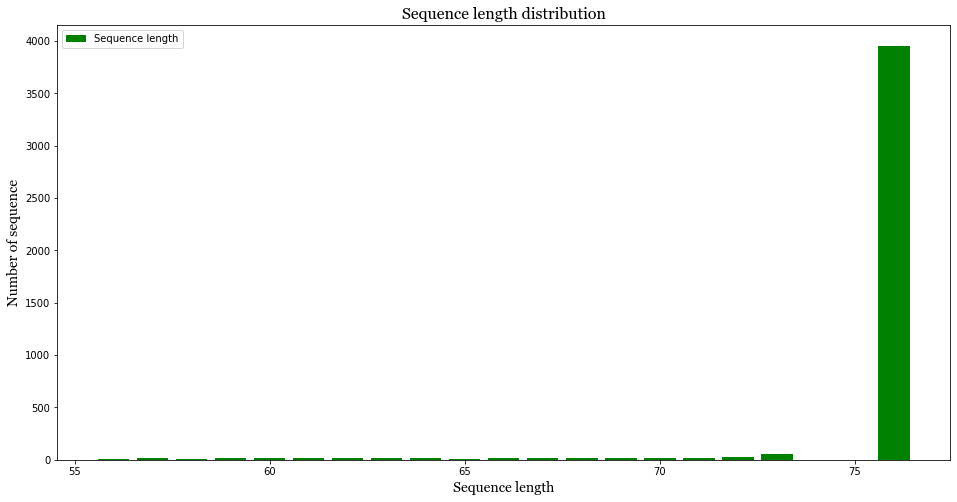

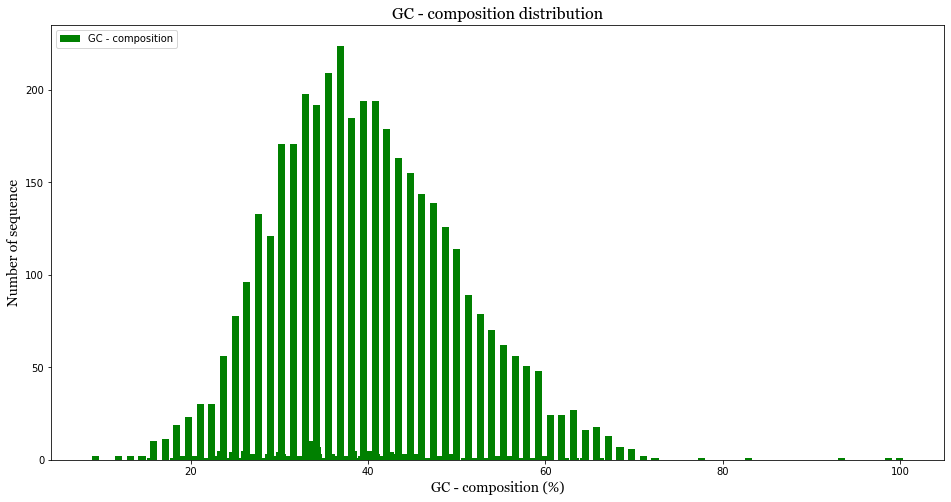

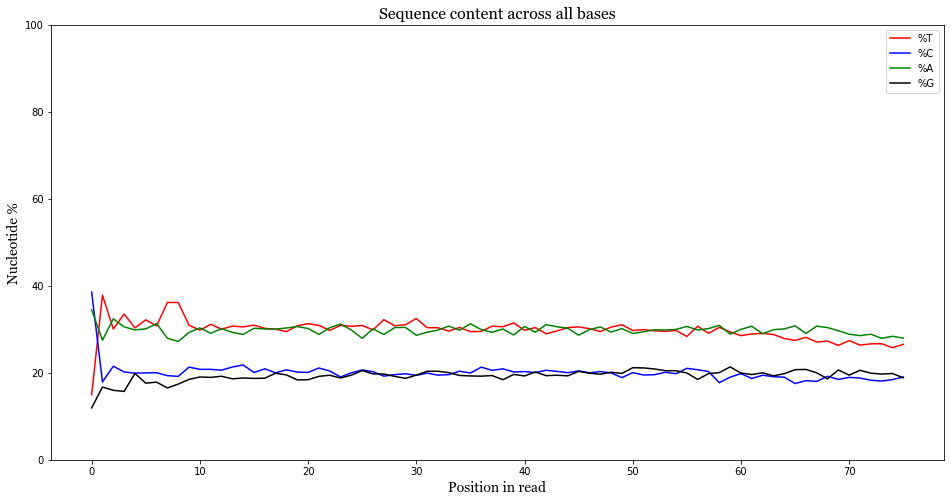

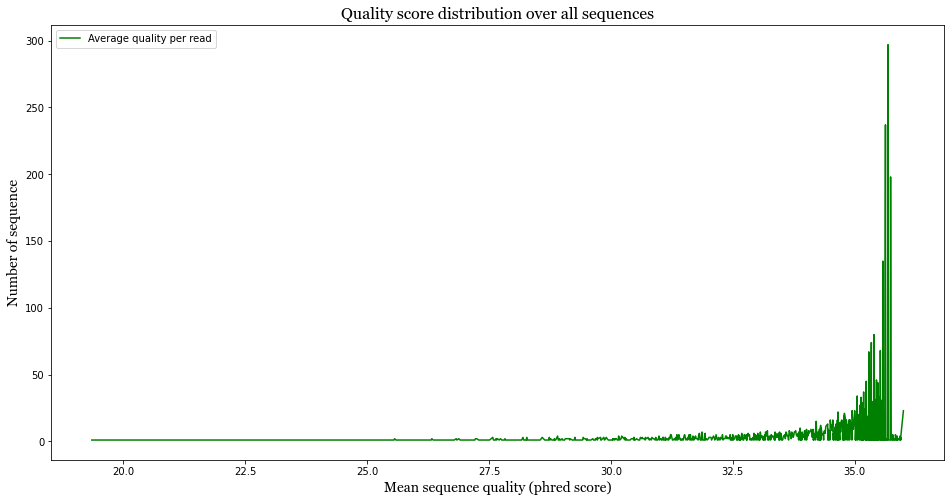

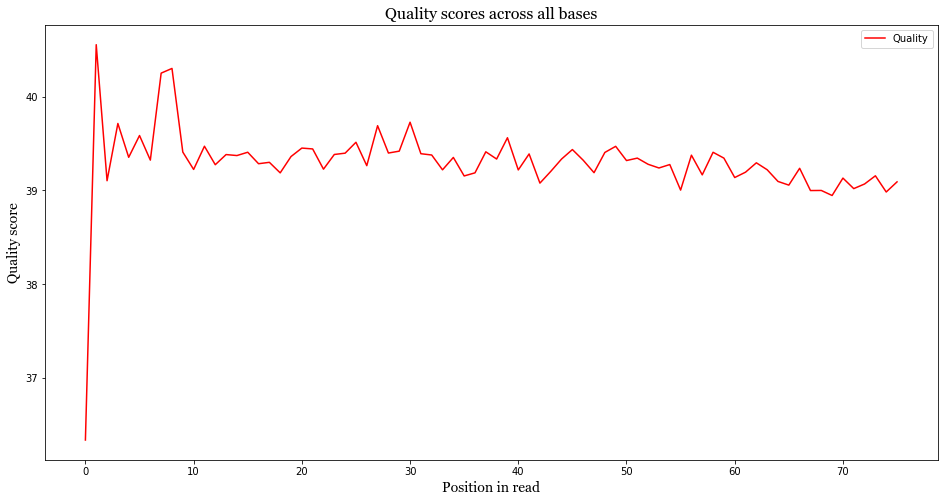

Do you want to create subplot from all graphs? (yes/no):  yes


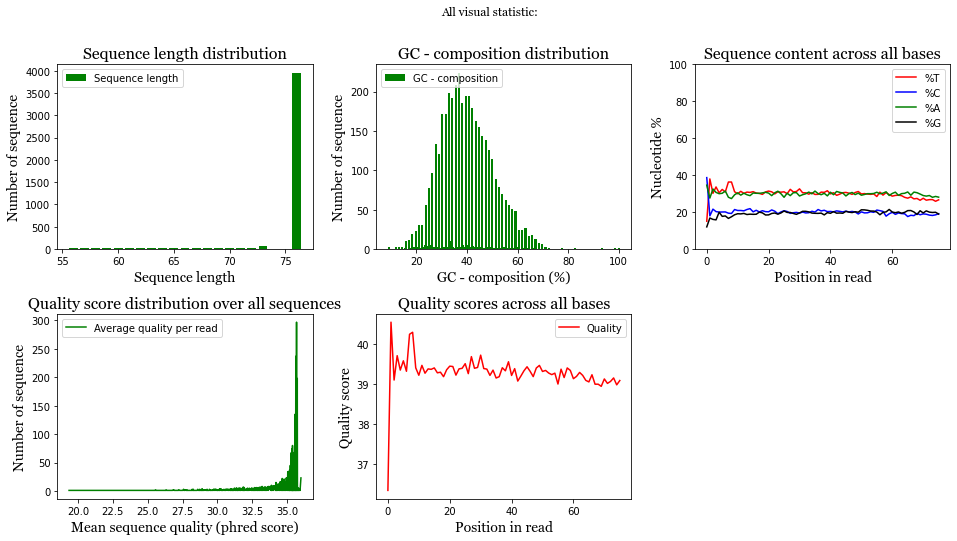

In [69]:
# место для ответа

# Parses fastq file
def read_fastq_file(inp_fastq_file):
    name, seq, optional, quality = '', '', '', ''
    for line in inp_fastq_file:
        line = line.rstrip()
        if line.startswith("@"):
            if name:
                yield(name, seq, optional, quality)
            name, seq, optional, quality = line, '', '', ''
        elif line.startswith("+"):
            optional = line
        else: 
            if optional:
                quality = line
            else: 
                seq = line
    if name: 
        yield(name, seq, optional, quality)

# Finds the most frequent element in list
def most_frequent(some_list):
    frequency = 0
    most_freq_elem = some_list[0]
    for elem in some_list:
        if some_list.count(elem) > frequency:
            frequency = some_list.count(elem)
            most_freq_elem = elem
    return most_freq_elem


# Defines type of sequence (DNA/RNA)
def nucl_seq_type(nucl_seq):
    par = True
    if 'U' in list(nucl_seq): 
        par = False
    return par

# Calculates total length of sequences
def total_length_of_seq(list_of_seq):
    total_length = 0
    for seq in list_of_seq:
        total_length += len(seq)
    return total_length
        
# Calculates nucleotide composition of sequence
def nucl_seq_composition(nucl_seq):
    dict_of_nucl = {}
    if nucl_seq_type(nucl_seq):
        for nucl in list('ATGC'):
            dict_of_nucl.update([(nucl, list(nucl_seq).count(nucl))])
    else:
        for nucl in list('AUGC'):
            dict_of_nucl.update([(nucl, list(nucl_seq).count(nucl))])
    return dict_of_nucl

# Calculates average nucleotide composition of sequences
def average_nucl_composition(list_of_seq):
    dict_of_nucl = {}
    total_length = total_length_of_seq(list_of_seq)
    if nucl_seq_type(list_of_seq[0]):
        for nucl in list('ATGC'):
            nucl_count = 0
            for seq in list_of_seq:
                nucl_count += nucl_seq_composition(seq)[nucl]
            dict_of_nucl.update([(nucl, nucl_count / total_length)])
    else:
         for nucl in list('AUGC'):
            nucl_count = 0
            for seq in list_of_seq:
                nucl_count += nucl_seq_composition(seq)[nucl]
            dict_of_nucl.update([(nucl, nucl_count / total_length)])
    return dict_of_nucl

# Calculates GC - composition (%) of sequence
def nucl_seq_gc(nucl_seq):
    dict_of_nucl = nucl_seq_composition(nucl_seq)
    gc_composition = ((dict_of_nucl['G'] + dict_of_nucl['C']) / len(nucl_seq)) * 100
    return gc_composition

# Finds average GC - composition of sequences
def average_gc_composition(list_of_seq):
    return sum([nucl_seq_gc(seq) for seq in list_of_seq]) / len(list_of_seq)

# Shows basic statistic of sequences in fastq file
def fastq_file_basic_statistic(path_to_inp_fastq_file):
    with open(path_to_inp_fastq_file, 'r') as inp_fastq_file:
        number_of_seq = 0
        list_of_seq = []
        for name, seq, optional, quality in read_fastq_file(inp_fastq_file):
            #print(name, seq, optional, quality, sep = '\n', end = '\n\n')
            number_of_seq += 1
            list_of_seq.append(seq)
        list_of_seq_length = [len(seq) for seq in list_of_seq]
    print(f'File name: {os.path.basename(path_to_inp_fastq_file)}')
    print(f'Number of sequences in fastq file: {number_of_seq}')
    print(f'Most frequent length of sequence: {most_frequent(list_of_seq_length)}')
    print(f'Average GC - composition of sequences: {average_gc_composition(list_of_seq)}')
    print(f'Average nucleotide composition of sequences: {average_nucl_composition(list_of_seq)}') 
    

def nucl_seq_phred_score(nucl_seq_quality):
    phred_score = 0
    for elem in nucl_seq_quality:
        phred_score += (ord(elem) - 33)
    return(phred_score / len(nucl_seq_quality))
    

# Finds the insertion of the first_seq in the second_seq with a length of overlap area >= min_insertion
# Returnes length of the overlap area
def overlap_seq(first_seq, second_seq, min_insertion):
    number_of_spaces = -1
    for i in range(0, len(first_seq)):
        if (first_seq[i:] in second_seq) and (second_seq.find(first_seq[i:]) == 0) and (len(first_seq[i:]) >= min_insertion):
            number_of_spaces = i
            sep_string = ' ' * number_of_spaces
            #print(first_seq)
            #print(f'{sep_string}{second_seq}')
            break
    if number_of_spaces == -1:
        #print('No overlap area')
        overlap_length = 0
    else: 
        overlap_length = len(first_seq[i:])
    return(overlap_length)

# Finds the insertions of the adapter from path_to_adapters_file in the sequences from path_to_inp_fastq_file with a length of overlap area >= min_insertion
# Asks for user permission to remove found insertions
# If permission is given, then saves fastq file with changes in path_to_out_fastq_file
# Returnes list of deleted adapters (clear list if no deletion)
def work_with_adapters(path_to_inp_fastq_file, path_to_adapters_file, path_to_out_fastq_file):
    with open(path_to_adapters_file, 'r') as inp_adapters_file:
        adapter_seq = inp_adapters_file.read().strip()
    #print(f'Adapter sequence: {adapter_seq}')
    adapter_min_insertion = int(input('Enter the minimum length of insertion of the adapter sequence: '))
    if adapter_min_insertion < 3:
        adapter_min_insertion = 3
        print('The minimum length of insertion cannot be less than 3')
        print('The minimum length of inserion is set to 3')
    del_par = str(input('Do you want to remove the adapters? (yes/no): '))
    list_of_deleted_adapters = []
    if del_par == 'yes':
        with open(path_to_inp_fastq_file, 'r') as inp_fastq_file:
            with open(path_to_out_fastq_file, 'w') as out_fastq_file:
                number_of_deleted_adapters = 0
                for name, seq, optional, quality in read_fastq_file(inp_fastq_file):
                    overlap_length = overlap_seq(adapter_seq, seq, adapter_min_insertion)
                    if overlap_length > 0:
                        seq = seq[overlap_length: ]
                        quality = quality[overlap_length: ]
                        list_of_deleted_adapters.append(seq[ :overlap_length])
                        number_of_deleted_adapters += 1
                    else:
                        list_of_deleted_adapters.append('None')
                    out_fastq_file.write(name + '\n')
                    out_fastq_file.write(seq + '\n')
                    out_fastq_file.write(optional + '\n')
                    out_fastq_file.write(quality + '\n')
                print(f'Number of deleted adapters: {number_of_deleted_adapters}')
                print(f'New fastq file saved as: {path_to_out_fastq_file}')
    else:
        print('No changes required')
    return list_of_deleted_adapters


font1 = {'family': 'Georgia', # это шрифт
        'color':  'black', # Цвет шрифта
        'weight': 'normal', # тип шрифта (жирный, полужирный и т.п.)
        'size': 16, # Размер Шрифта
        }
font2 = {'family': 'Georgia', # это шрифт
        'color':  'black', # Цвет шрифта
        'weight': 'normal', # тип шрифта (жирный, полужирный и т.п.)
        'size': 14, # Размер Шрифта
        }

# Shows graph of distribution of sequence length from path_to_fastq_file
### and saves it to path_to_out_graph_dir with user_dpi
def graph_len_distr(path_to_fastq_file, path_to_out_graph_dir, user_dpi):
    #path_to_out_graph = os.path.join(path_to_out_graph_dir, 'len_distr.png')
    list_of_length = []
    with open(path_to_fastq_file, 'r') as fastq_file:
        for name, seq, optional, quality in read_fastq_file(fastq_file):
            list_of_length.append(len(seq))
    x = list(set(list_of_length))
    y = []
    for elem in x:
        y.append(list_of_length.count(elem))
    #plt.figure(figsize=(16, 8))
    plt.bar(x, y, color='g')
    plt.title('Sequence length distribution', fontdict = font1)
    plt.xlabel('Sequence length', fontdict = font2)
    plt.ylabel('Number of sequence', fontdict = font2)
    plt.legend(['Sequence length'], loc = 2)
    #fig = plt.gcf()
    #fig.savefig(path_to_out_graph, dpi = user_dpi)
    #plt.show()

# Shows graph of GC - composition for sequences from path_to_fastq_file 
### and saves it to path_to_out_graph_dir with user_dpi
def graph_gc_comp(path_to_fastq_file, path_to_out_graph_dir, user_dpi):
    #path_to_out_graph = os.path.join(path_to_out_graph_dir, 'gc_comp.png')
    list_of_gc = []
    with open(path_to_fastq_file, 'r') as fastq_file:
        for name, seq, optional, quality in read_fastq_file(fastq_file):
            list_of_gc.append(nucl_seq_gc(seq))
    x = list(set(list_of_gc))
    x.sort()
    y = []
    for elem in x:
        y.append(list_of_gc.count(elem))
    #plt.figure(figsize=(16, 8))
    plt.bar(x, y, color='g')
    plt.title('GC - composition distribution', fontdict = font1)
    plt.xlabel('GC - composition (%)', fontdict = font2)
    plt.ylabel('Number of sequence', fontdict = font2)
    plt.legend(['GC - composition'], loc = 2)
    #fig = plt.gcf()
    #fig.savefig(path_to_out_graph, dpi = user_dpi)
    #plt.show()
    
# Shows graph of nucleotide frequency per position for sequences from path_to_fastq_file
### and saves it to path_to_out_graph_dir with user_dpi   
def graph_nucl_per_pos(path_to_fastq_file, path_to_out_graph_dir, user_dpi):
    #path_to_out_graph = os.path.join(path_to_out_graph_dir, 'nucl_per_pos.png')
    list_of_freq_A = []
    list_of_freq_T = []
    list_of_freq_G = []
    list_of_freq_C = []
    with open(path_to_fastq_file, 'r') as fastq_file:
        number_of_seq = 0
        list_of_seq = []
        list_of_length = []
        for name, seq, optional, quality in read_fastq_file(fastq_file):
            list_of_seq.append(seq)
            list_of_length.append(len(seq))
            number_of_seq += 1     
    i_pos_of_seq = []
    for i in range(0, max(list_of_length)):
        i_pos_of_seq = [seq[i] if (len(seq) > i) else 'None' for seq in list_of_seq]
        list_of_freq_A.append(i_pos_of_seq.count('A') / number_of_seq * 100)
        list_of_freq_T.append(i_pos_of_seq.count('T') / number_of_seq * 100)
        list_of_freq_G.append(i_pos_of_seq.count('G') / number_of_seq * 100)
        list_of_freq_C.append(i_pos_of_seq.count('C') / number_of_seq * 100)
    yA = list_of_freq_A
    yT = list_of_freq_T
    yG = list_of_freq_G
    yC = list_of_freq_C
    x = [i for i in range(0, max(list_of_length)) ]
    #plt.figure(figsize=(16, 8))
    plt.ylim([0, 100])
    plt.plot(x, yT, color='r')
    plt.plot(x, yC, color='b')
    plt.plot(x, yA, color='g')
    plt.plot(x, yG, color='black')
    plt.title('Sequence content across all bases', fontdict = font1)
    plt.xlabel('Position in read', fontdict = font2)
    plt.ylabel('Nucleotide %', fontdict = font2)
    plt.legend(['%T', '%C', '%A', '%G'], loc = 1)
    #fig = plt.gcf()
    #fig.savefig(path_to_out_graph, dpi = user_dpi)
    #plt.show()

# Shows graph of average phred score for sequences from path_to_fastq_file
### and saves it to path_to_out_graph_dir with user_dpi
def graph_avg_phred_sc(path_to_fastq_file, path_to_out_graph_dir, user_dpi):
    #path_to_out_graph = os.path.join(path_to_out_graph_dir, 'avg_phred_sc.png')
    list_of_phred_score = []
    with open(path_to_fastq_file, 'r') as fastq_file:
        for name, seq, optional, quality in read_fastq_file(fastq_file):
            list_of_phred_score.append(nucl_seq_phred_score(quality))
    x = list(set(list_of_phred_score))
    x.sort()
    y = []
    for elem in x:
        y.append(list_of_phred_score.count(elem))
    #plt.figure(figsize=(16, 8))
    plt.plot(x, y, color='g')
    plt.title('Quality score distribution over all sequences', fontdict = font1)
    plt.xlabel('Mean sequence quality (phred score)', fontdict = font2)
    plt.ylabel('Number of sequence', fontdict = font2)
    plt.legend(['Average quality per read'], loc = 2)
    #fig = plt.gcf()
    #fig.savefig(path_to_out_graph, dpi = user_dpi)
    #plt.show()

# Shows graph of phred score per position for sequences from path_to_fastq_file
### and saves it to path_to_out_graph_dir with user_dpi    
def graph_phred_sc_per_pos(path_to_fastq_file, path_to_out_graph_dir, user_dpi):
    #path_to_out_graph = os.path.join(path_to_out_graph_dir, 'phred_sc_per_pos.png')
    with open(path_to_fastq_file, 'r') as fastq_file:
        number_of_seq = 0
        list_of_seq = []
        list_of_length = []
        for name, seq, optional, quality in read_fastq_file(fastq_file):
            list_of_seq.append(seq)
            list_of_length.append(len(seq))
            number_of_seq += 1
    list_of_quality = []
    i_pos_of_seq = []
    for i in range(0, max(list_of_length)):
        i_pos_of_seq = [seq[i] if (len(seq) > i) else 'None' for seq in list_of_seq]
        phred_score = 0
        number_of_symbols = 0
        for nucl in i_pos_of_seq:
            if nucl != 'None':
                phred_score += (ord(nucl) - 33)
                number_of_symbols += 1
        list_of_quality.append(phred_score / number_of_symbols)
    y = list_of_quality
    x = [i for i in range(0, max(list_of_length)) ]
    #plt.figure(figsize=(16, 8))
    plt.plot(x, y, color='r')
    plt.title('Quality scores across all bases', fontdict = font1)
    plt.xlabel('Position in read', fontdict = font2)
    plt.ylabel('Quality score', fontdict = font2)
    plt.legend(['Quality'], loc = 1)
    #fig = plt.gcf()
    #fig.savefig(path_to_out_graph, dpi = user_dpi)
    #plt.show()  

# Creates all graphs for the file path_to_fastq_file
# and saves them individually in the directory path_to_out_graph_dir with user_dpi
def full_visual_statistic(path_to_fastq_file, path_to_out_graph_dir, user_dpi):
    plt.figure(figsize=(16, 8))
    graph_len_distr(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    path_to_out_graph = os.path.join(path_to_out_graph_dir, 'len_distr.png')
    fig = plt.gcf()
    fig.savefig(path_to_out_graph, dpi = user_dpi)
    plt.show()
    plt.figure(figsize=(16, 8))
    graph_gc_comp(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    path_to_out_graph = os.path.join(path_to_out_graph_dir, 'gc_comp.png')
    fig = plt.gcf()
    fig.savefig(path_to_out_graph, dpi = user_dpi)
    plt.show()
    plt.figure(figsize=(16, 8))
    graph_nucl_per_pos(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    path_to_out_graph = os.path.join(path_to_out_graph_dir, 'nucl_per_pos.png')
    fig = plt.gcf()
    fig.savefig(path_to_out_graph, dpi = user_dpi)
    plt.show()
    plt.figure(figsize=(16, 8))
    graph_avg_phred_sc(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    path_to_out_graph = os.path.join(path_to_out_graph_dir, 'avg_phred_sc.png')
    fig = plt.gcf()
    fig.savefig(path_to_out_graph, dpi = user_dpi)
    plt.show()
    plt.figure(figsize=(16, 8))
    graph_phred_sc_per_pos(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    path_to_out_graph = os.path.join(path_to_out_graph_dir, 'phred_sc_per_pos.png')
    fig = plt.gcf()
    fig.savefig(path_to_out_graph, dpi = user_dpi)
    plt.show()

# Creates all graphs for the file path_to_fastq_file
# and saves them as subplots in the directory path_to_out_graph_dir with user_dpi    
def full_visual_statistic_subplots(path_to_fastq_file, path_to_out_graph_dir, user_dpi):
    path_to_out_vis_stat = os.path.join(path_to_out_graph_dir, 'All_visual_statistic.png')
    plt.figure(figsize=(16, 8))
    plt.subplot(2, 3, 1)
    graph_len_distr(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    plt.subplot(2, 3, 2)
    graph_gc_comp(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    plt.subplot(2, 3, 3)
    graph_nucl_per_pos(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    plt.subplot(2, 3, 4)
    graph_avg_phred_sc(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    plt.subplot(2, 3, 5)
    graph_phred_sc_per_pos(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
    plt.suptitle('All visual statistic:', fontdict = font1)
    plt.subplots_adjust(hspace=0.35)
    plt.subplots_adjust(wspace=0.25)
    plt.savefig(path_to_out_vis_stat, dpi = user_dpi)
    plt.show()



# Creates a table with complete fqstq file (path_to_fastq_file) statistics 
# Taking into account removed (or not removed) adapters
# Returnes a pd.DataFrame
# And saves it to path_to_out_table
def full_statistic_to_table(path_to_fastq_file, list_of_deleted_adapters, path_to_out_table):
    data = []
    with open(path_to_fastq_file, 'r') as fastq_file:
        tmp = 0
        for name, seq, optional, quality in read_fastq_file(fastq_file):
            if list_of_deleted_adapters:
                data.append([name, seq, optional, quality, len(seq), nucl_seq_gc(seq), \
                             nucl_seq_composition(seq), nucl_seq_phred_score(quality), list_of_deleted_adapters[tmp]])
                tmp += 1
            else:
                data.append([name, seq, optional, quality, len(seq), nucl_seq_gc(seq), \
                             nucl_seq_composition(seq), nucl_seq_phred_score(quality), 'None'])              
    full_statistic_table = pd.DataFrame(data, columns = ['Name', 'Seq', 'Optional', 'Quality', 'Length', 'GC - composition', \
                                                          'Nucleotide composition', 'Phred score', 'Deleted adapter'])
    full_statistic_table.to_csv(path_to_out_table, sep = '\t')
    return full_statistic_table
    
    
    
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
path_to_code = os.getcwd()
path_to_inp_fastq_file = os.path.join(path_to_code, os.pardir, 'lections', 'files_and_images', 'final_task', 'READS055722.student_11.fastq')
path_to_adapters_file = os.path.join(path_to_code, os.pardir, 'lections', 'files_and_images', 'final_task', 'adapters.txt')
path_to_out_fastq_file = os.path.join(path_to_code, os.pardir, 'lections', 'files_and_images', 'final_task', 'READS055722.student_11_changed.fastq')
path_to_out_graph_dir = os.path.join(path_to_code, os.pardir, 'lections', 'files_and_images', 'final_task')
path_to_out_table_initial = os.path.join(path_to_code, os.pardir, 'lections', 'files_and_images', 'final_task', 'full_stat_initial.tsv')
path_to_out_table_changed = os.path.join(path_to_code, os.pardir, 'lections', 'files_and_images', 'final_task', 'full_stat_changed.tsv')

fastq_file_basic_statistic(path_to_inp_fastq_file)
print('\n')
list_of_deleted_adapters = work_with_adapters(path_to_inp_fastq_file, path_to_adapters_file, path_to_out_fastq_file)
print('\n')
fastq_file_basic_statistic(path_to_out_fastq_file)

user_dpi = int(input('\nEnter required quality for graphs (dpi): '))
full_visual_statistic(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
subplot_par = str(input('Do you want to create subplot from all graphs? (yes/no): '))
if subplot_par == 'yes':
    full_visual_statistic_subplots(path_to_out_fastq_file, path_to_out_graph_dir, user_dpi)
else:
    print('Subplot is not required')

full_stat_initial = full_statistic_to_table(path_to_inp_fastq_file, [], path_to_out_table_initial)
full_stat_changed = full_statistic_to_table(path_to_out_fastq_file, list_of_deleted_adapters, path_to_out_table_changed)


In [70]:
full_stat_initial

,Name,Seq,Optional,Quality,Length,GC - composition,Nucleotide composition,Phred score,Deleted adapter
0,@NS500343:164:HTL33BGXY:1:11102:2774:10958 1:N...,TGAAATGAAGTGAAATGAAATGAAATAATGAAATTGAAATGAGATG...,+,AAAAAEEEEAEEEEEEEEEEEEEAEEEE/EEEEEEAEEEE/EEE6/...,76,23.684211,"{'A': 41, 'T': 17, 'G': 18, 'C': 0}",30.526316,None
1,@NS500343:164:HTL33BGXY:1:11104:8123:4535 1:N:...,CTGGGCACGGTGGCACGCATCTGTAGTCCCAGCTGCTCAGGAGGCT...,+,AAAAAEAE/EEA/E/AAEEAAAEEEEAE<EEEEAEEEEE/AEEEEE...,76,59.210526,"{'A': 20, 'T': 11, 'G': 25, 'C': 20}",31.500000,None
2,@NS500343:164:HTL33BGXY:1:11103:19802:4256 1:N...,TCTTAACAAACCCATGTGGCTTGGGGTGTTTCTAGAGTCAACCCAG...,+,AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE/EEEEE...,76,38.157895,"{'A': 24, 'T': 23, 'G': 16, 'C': 13}",35.447368,None
3,@NS500343:164:HTL33BGXY:1:11105:10891:8412 1:N...,CTCTGCCTACCAAATCCTGGCCAAGGGGACCTGGGGGCAAGTCTGC...,+,AAAAAEEEEEEEEEAAEEE/EAEEEEEEEEEE/EEEEEEEEEEEEA...,76,60.526316,"{'A': 15, 'T': 15, 'G': 25, 'C': 21}",34.486842,None
4,@NS500343:164:HTL33BGXY:1:11106:8384:16301 1:N...,AGTTCAGTTCACAGAGCCACGTGATGGCTGACTAGGGGGTCAAAGC...,+,AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,76,51.315789,"{'A': 15, 'T': 22, 'G': 23, 'C': 16}",35.631579,None
...,...,...,...,...,...,...,...,...,...
4274,@NS500343:164:HTL33BGXY:1:11106:13750:5425 1:N...,TCTCGTATTGGTTACCTCCAGTTAACCGTGGTCTGAAAATACTAAA...,+,AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,76,34.210526,"{'A': 28, 'T': 22, 'G': 12, 'C': 14}",35.736842,None
4275,@NS500343:164:HTL33BGXY:1:11106:3595:2888 1:N:...,AGGTTATCATCTCGTATCTAAGAAATTTTCTTCAGCTAAGAACAAA...,+,AAAAAEEEEEEEEEEEEEEAEEEEEEEEEEAEEEEEEEEEEEEEEE...,76,26.315789,"{'A': 31, 'T': 25, 'G': 8, 'C': 12}",35.171053,None
4276,@NS500343:164:HTL33BGXY:1:11102:11056:6962 1:N...,CATCTCGTATAATCGAATAGATAATCTACTAACTTGTTAACCAAGA...,+,AAAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,76,31.578947,"{'A': 33, 'T': 19, 'G': 8, 'C': 16}",35.684211,None
4277,@NS500343:164:HTL33BGXY:1:11102:25890:11551 1:...,ATCATCTCGTATCCCCTCCCCACATCAAGCCCGAATGATATTTCCT...,+,/AAAA6EAEEE/EEEEEEEEE/E/EEEEEEEE/AEEEEEEEEEEE/...,76,51.315789,"{'A': 16, 'T': 21, 'G': 7, 'C': 32}",32.421053,None


In [71]:
full_stat_changed

,Name,Seq,Optional,Quality,Length,GC - composition,Nucleotide composition,Phred score,Deleted adapter
0,@NS500343:164:HTL33BGXY:1:11102:2774:10958 1:N...,TGAAATGAAGTGAAATGAAATGAAATAATGAAATTGAAATGAGATG...,+,AAAAAEEEEAEEEEEEEEEEEEEAEEEE/EEEEEEAEEEE/EEE6/...,76,23.684211,"{'A': 41, 'T': 17, 'G': 18, 'C': 0}",30.526316,None
1,@NS500343:164:HTL33BGXY:1:11104:8123:4535 1:N:...,CTGGGCACGGTGGCACGCATCTGTAGTCCCAGCTGCTCAGGAGGCT...,+,AAAAAEAE/EEA/E/AAEEAAAEEEEAE<EEEEAEEEEE/AEEEEE...,76,59.210526,"{'A': 20, 'T': 11, 'G': 25, 'C': 20}",31.500000,None
2,@NS500343:164:HTL33BGXY:1:11103:19802:4256 1:N...,TCTTAACAAACCCATGTGGCTTGGGGTGTTTCTAGAGTCAACCCAG...,+,AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE/EEEEE...,76,38.157895,"{'A': 24, 'T': 23, 'G': 16, 'C': 13}",35.447368,None
3,@NS500343:164:HTL33BGXY:1:11105:10891:8412 1:N...,CTCTGCCTACCAAATCCTGGCCAAGGGGACCTGGGGGCAAGTCTGC...,+,AAAAAEEEEEEEEEAAEEE/EAEEEEEEEEEE/EEEEEEEEEEEEA...,76,60.526316,"{'A': 15, 'T': 15, 'G': 25, 'C': 21}",34.486842,None
4,@NS500343:164:HTL33BGXY:1:11106:8384:16301 1:N...,AGTTCAGTTCACAGAGCCACGTGATGGCTGACTAGGGGGTCAAAGC...,+,AAAAAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,76,51.315789,"{'A': 15, 'T': 22, 'G': 23, 'C': 16}",35.631579,None
...,...,...,...,...,...,...,...,...,...
4274,@NS500343:164:HTL33BGXY:1:11106:13750:5425 1:N...,TGGTTACCTCCAGTTAACCGTGGTCTGAAAATACTAAATGGGAAAT...,+,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,68,33.823529,"{'A': 27, 'T': 18, 'G': 11, 'C': 12}",36.000000,TGGTTACC
4275,@NS500343:164:HTL33BGXY:1:11106:3595:2888 1:N:...,CTAAGAAATTTTCTTCAGCTAAGAACAAAATTTATTCACAAAGTAT...,+,EEAEEEEEEEEEEAEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,59,23.728814,"{'A': 27, 'T': 18, 'G': 5, 'C': 9}",35.271186,CTAAGAAATTTTCTTCA
4276,@NS500343:164:HTL33BGXY:1:11102:11056:6962 1:N...,AATCGAATAGATAATCTACTAACTTGTTAACCAAGAAGAAATGTAA...,+,EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE...,66,30.303030,"{'A': 31, 'T': 15, 'G': 7, 'C': 13}",36.000000,AATCGAATAG
4277,@NS500343:164:HTL33BGXY:1:11102:25890:11551 1:...,CCCCTCCCCACATCAAGCCCGAATGATATTTCCTATTCGCCTACAC...,+,EEEEEEEEE/E/EEEEEEEE/AEEEEEEEEEEE/EEEEEAE/EEEE...,64,54.687500,"{'A': 13, 'T': 16, 'G': 6, 'C': 29}",32.984375,CCCCTCCCCACA
